### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2310]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2312]:
data = pd.read_csv('data/coupons.csv')

In [2313]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [2314]:
data.sample()
data.shape

(12684, 26)

In [2315]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [2316]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [2317]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [2318]:
data.nunique()
unique_values_per_column = data.apply(lambda x: x.unique())
pd.set_option('display.max_colwidth', None)
unique_values_per_column.to_frame()


,0
destination,"[No Urgent Place, Home, Work]"
passanger,"[Alone, Friend(s), Kid(s), Partner]"
weather,"[Sunny, Rainy, Snowy]"
temperature,"[55, 80, 30]"
time,"[2PM, 10AM, 6PM, 7AM, 10PM]"
coupon,"[Restaurant(<20), Coffee House, Carry out & Take away, Bar, Restaurant(20-50)]"
expiration,"[1d, 2h]"
gender,"[Female, Male]"
age,"[21, 46, 26, 31, 41, 50plus, 36, below21]"
maritalStatus,"[Unmarried partner, Single, Married partner, Divorced, Widowed]"


In [2319]:
grouped = data['Y'].groupby(data['Y']).count()
print(grouped)
grouped_2 = data_no_duplicates_no_old_cars['Y'].groupby(data_no_duplicates_no_old_cars['Y']).count()
print(grouped_2)
grouped_3 = data_1['Y'].groupby(data_1['Y']).count()
print(grouped_3)
grouped_4 = data_filtered['Y'].groupby(data_filtered['Y']).count()
print(grouped_4)

Y
0    5474
1    7210
Name: Y, dtype: int64
Y
0    5449
1    7140
Name: Y, dtype: int64
Y
0    5449
1    7140
Name: Y, dtype: int64
Y
0    5449
1    7140
Name: Y, dtype: int64


2. Investigate the dataset for missing or problematic data.

In [2321]:
data.shape # Investigation of shape of data show (12684, 26)
print('Orginal data set, no. of row and columns are' + str(data.shape))

Orginal data set, no. of row and columns are(12684, 26)


In [2322]:
####Investigating for Duplicate rows
duplicate_rows_sum = data.duplicated().sum() # Shows 74 duplicate rows 
#print(duplicate_rows_sum)
###Printing duplicate rows
duplicate_rows = data[data.duplicated(keep = False)]
pd.set_option('display.max_rows', None)
#print(duplicate_rows)
data_no_duplicates = data.drop_duplicates() #Droping duplicates and creating a new dataFrame data_no_duplicates
print('After removing duplicates,the remaing number of row and columns are' + str(data_no_duplicates.shape)) #12610 rows and 26 columns

After removing duplicates,the remaing number of row and columns are(12610, 26)


In [2323]:
####Investigating/filtering car values =="Car that is too old to install Onstar :D" and deleting the rows
data_no_duplicates_no_old_cars = data_no_duplicates[data_no_duplicates['car']!="Car that is too old to install Onstar :D"]
data_no_duplicates_no_old_cars.shape # (12589, 26) 21 rows/cars that cannot receive coupons via onstart
###Investigating nan values in column car and replaceing it with 'unknowm' 
data_no_duplicates_no_old_cars.loc[data_no_duplicates_no_old_cars['car'].isna(), 'car'] = 'unknown'
##Checking to see if replace values worked
data_no_duplicates_no_old_cars['car'].unique()
data_1 = data_no_duplicates_no_old_cars
# grouped_3 = data_1['Y'].groupby(data_1['Y']).count()
# print(grouped_3)
# data_no_duplicates_no_old_cars.shape
data_1.isna().sum()
y = data_1.shape
print('After removing duplicates and cars that are too old to install Onstar,the remaing number of row and columns are' + str(data_1.shape))


After removing duplicates and cars that are too old to install Onstar,the remaing number of row and columns are(12589, 26)


In [2324]:
#data_1.head(2)

3. Decide what to do about your missing data -- drop, replace, other...

In [2326]:
####Investigating for missing or NaN values for other rows and dropping them 
data_1.isna().sum()
data_filtered = data_1.fillna('unknown')
#data_filtered.shape #(12140, 26)
data_filtered.isna().sum() #check to see the data set has no 'nan'
data_filtered.shape
print('After removing duplicates & cars that are too old to install Onstar,and replacing NaN with unknowns the remaing number of row and columns are' + str(data_filtered.shape))
print("It was decided to replace with unknown as dropping Nan will delete all the rows with ['Y'] = 0")
#data_filtered.head(2)

After removing duplicates & cars that are too old to install Onstar,and replacing NaN with unknowns the remaing number of row and columns are(12589, 26)
It was decided to replace with unknown as dropping Nan will delete all the rows with ['Y'] = 0


4. What proportion of the total observations chose to accept the coupon?



In [2328]:
data_filtered_accept = data_filtered[data_filtered['Y'] == 1]
obs_accept = len(data_filtered_accept)
obs_total =len(data_filtered)
Proportion_of_the_total_observations_chose_to_accept_the_coupon = round(obs_accept/obs_total,2)
ans_4 = Proportion_of_the_total_observations_chose_to_accept_the_coupon
ans_4 # Answer is 57% of the total obs chose to accept the coupon
print("Proportion of the total observations that chose to accept the coupon after cleaning the data is " + str(ans_4))

Proportion of the total observations that chose to accept the coupon after cleaning the data is 0.57


In [2329]:
# y =data_filtered.groupby('coupon').count()
# print(y)
# grouped = data_filtered.groupby(['coupon', 'Y']).count()
# grouped

5. Use a bar plot to visualize the `coupon` column.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Bar'),
  Text(1, 0, 'Carry out & Take away'),
  Text(2, 0, 'Coffee House'),
  Text(3, 0, 'Restaurant(20-50)'),
  Text(4, 0, 'Restaurant(<20)')])

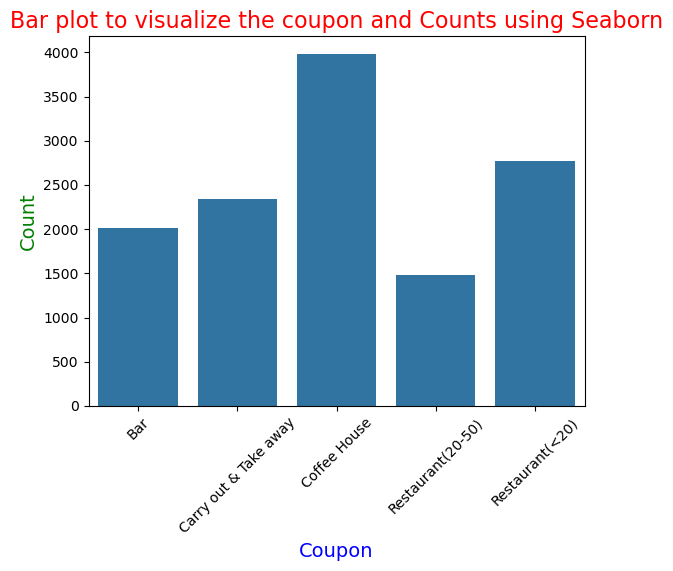

In [2331]:
coupon_counts = data_filtered.groupby('coupon').size()
x = coupon_counts.index
y = coupon_counts.values
sns.barplot(x=x, y=y)
plt.xlabel("Coupon", fontsize=14, color='blue')
plt.ylabel("Count", fontsize=14, color='green')
plt.title("Bar plot to visualize the coupon and Counts using Seaborn", fontsize=16, color='red')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Bar plot to visualize the coupon and Counts using Matplotlib')

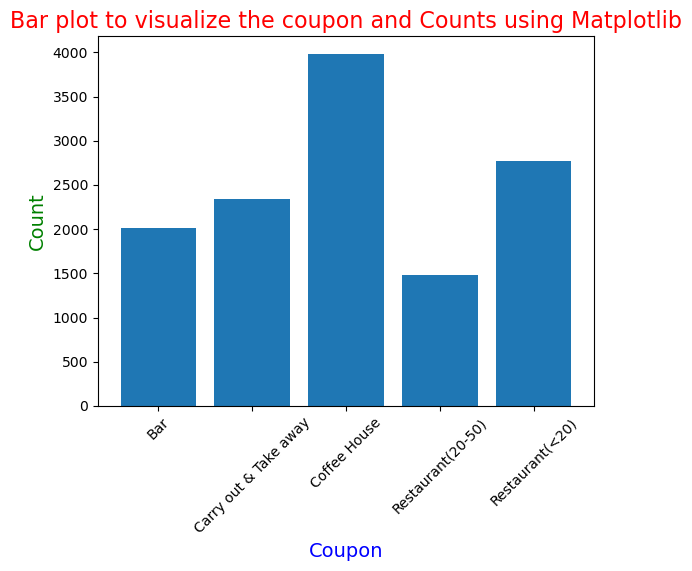

In [2332]:
plt.bar(x,y)
plt.xticks(rotation =45)
plt.xlabel("Coupon", fontsize=14, color='blue')
plt.ylabel("Count", fontsize=14, color='green')
plt.title("Bar plot to visualize the coupon and Counts using Matplotlib", fontsize=16, color='red')

6. Use a histogram to visualize the temperature column.

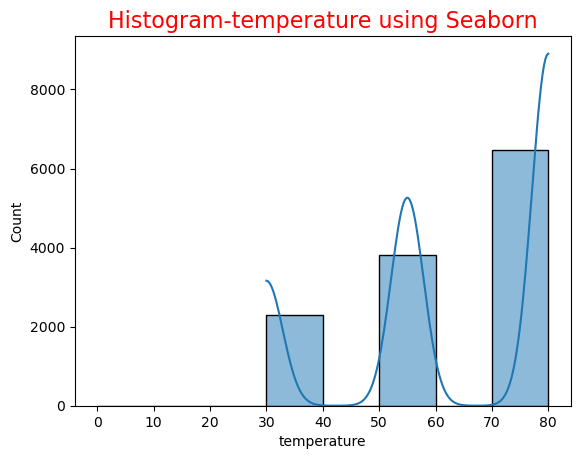

In [2334]:
sns.histplot(data_filtered,x='temperature',bins =10, binrange=(0,80),binwidth =10,stat ='count',kde=True)
plt.title("Histogram-temperature using Seaborn", fontsize=16, color='red')
plt.savefig("Temphist.png", dpi=300)

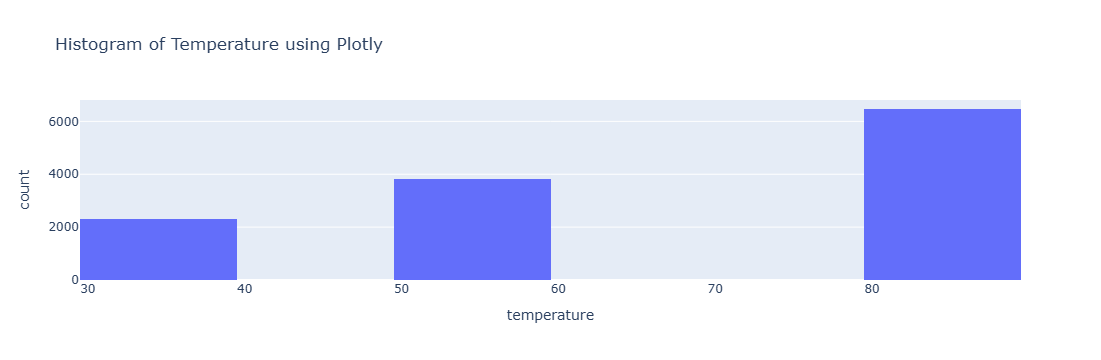

In [2335]:
import plotly.express as px
import pandas as pd
fig =px.histogram(data_filtered,x='temperature',nbins=10,title='Histogram of Temperature using Plotly', labels=None)

fig

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [2337]:
data_filtered_bar_coupon =data_filtered[data_filtered['coupon']=='Bar']
data_filtered_bar_coupon.shape
print('DataFrame that contains just the Bar Coupons is named data_filtered_bar_coupon and it has ' +str(data_filtered_bar_coupon.shape) + 'rows and columns')

DataFrame that contains just the Bar Coupons is named data_filtered_bar_coupon and it has (2008, 26)rows and columns


In [2338]:
data_filtered_bar_coupon.groupby('Bar')['Y'].sum()


Bar
1~3        257
4~8        117
gt8         36
less1      250
never      156
unknown      8
Name: Y, dtype: int64

2. What proportion of bar coupons were accepted?


In [2340]:
####Method_1 without using groupby table 
nrow_Bar_total = len(data_filtered_bar_coupon)
Bar_total_accepted = data_filtered_bar_coupon[data_filtered_bar_coupon['Y']==1]
nrows_Bar_total_accepted = len(Bar_total_accepted)
proportion_of_bar_coupons_were_accepted = round(nrows_Bar_total_accepted/nrow_Bar_total,2)
# print(nrows_Bar_total_accepted)
# print(nrow_Bar_total)
print('Proportion of bar coupons that were accepted is ' + str(proportion_of_bar_coupons_were_accepted)+ ' without using groupby function')

Proportion of bar coupons that were accepted is 0.41 without using groupby function


In [2341]:
####Method_2 with using groupby table 
grouped_by_Bar_coupon = data_filtered_bar_coupon.groupby(['coupon', 'Y']).count()
filtered_data_Acceptance = data_filtered_bar_coupon[data_filtered_bar_coupon['Y'] == 1]
filtered_data_Acceptance = filtered_data_Acceptance['Y'].count()
Total_Bar = grouped_by_Bar_coupon['Bar'].sum()
proportion_of_bar_coupons_were_accepted_2 = round(filtered_data_Acceptance/Total_Bar,2)
# print(filtered_data_Acceptance)
# print(Total_Bar)
# print(proportion_of_bar_coupons_were_accepted_2)
print('Proportion of bar coupons that were accepted is ' + str(proportion_of_bar_coupons_were_accepted_2)+ ' with using groupby function')

Proportion of bar coupons that were accepted is 0.41 with using groupby function


In [2342]:
# grouped_by_Bar_coupon = data_filtered_bar_coupon.groupby(['Bar', 'Y']).count()
# grouped_by_Bar_coupon

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [2344]:
Bar_3_or_fewer = data_filtered_bar_coupon[data_filtered_bar_coupon['Bar'].isin(["less1","1~3"])]
Total_nrows_Bar_3_or_fewer =len(Bar_3_or_fewer)

Bar_3_or_fewer_accepted =Bar_3_or_fewer[Bar_3_or_fewer['Y']==1]
nrows_Bar_3_or_fewer = len(Bar_3_or_fewer_accepted)

Acceptance_rate_Bar_3_or_fewer_1 = round(nrows_Bar_3_or_fewer/Total_nrows_Bar_3_or_fewer,3)

print('Acceptance rate between those who went to a bar 3 or fewer times a month '+ str(Acceptance_rate_Bar_3_or_fewer_1))
############################################################################################################
Bar_more_than_3 = data_filtered_bar_coupon[data_filtered_bar_coupon['Bar'].isin(["gt8","4~8"])]
Total_nrows_Bar_more_than_3 = len(Bar_more_than_3)

Bar_more_than_3_accepted = Bar_more_than_3[Bar_more_than_3['Y']==1]
nrows_Bar_more_than_3 =len(Bar_more_than_3_accepted)

Acceptance_rate_Bar_more_than_3 = round(nrows_Bar_more_than_3/Total_nrows_Bar_more_than_3,3)

print('Acceptance rate between those who went to a bar MORE THAN 3 or fewer times a month '+ str(Acceptance_rate_Bar_more_than_3))



Acceptance rate between those who went to a bar 3 or fewer times a month 0.528
Acceptance rate between those who went to a bar MORE THAN 3 or fewer times a month 0.769


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [2346]:
df=data_filtered_bar_coupon[data_filtered_bar_coupon['Bar'].isin(['1~3','4~8','gt8'])]
df1=df[df['age'].isin(['26','31','36','41','46','50plus'])]
Total_nrows_df1 =len(df1)
acceptnace_df1 = df1[df1['Y']==1]
nrow_accpetance = len(acceptnace_df1 )
Acceptance_rate = round(nrow_accpetance/Total_nrows_df1,3)

print('Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 ' + str(Acceptance_rate))
############################################################################################
df2=data_filtered_bar_coupon[~data_filtered_bar_coupon['Bar'].isin(['1~3','4~8','gt8'])]
df3=df2[~df2['age'].isin(['26','31','36','41','46','50plus'])]
Total_nrows_df3 =len(df3)
acceptnace_df3 = df3[df3['Y']==1]
nrow_accpetance_others = len(acceptnace_df3)
Acceptance_rate_others = round(nrow_accpetance_others/Total_nrows_df3,3)

print('Acceptance rate of all other ' + str(Acceptance_rate_others))
print('Yes, there is difference of 75% between the two categories')

Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 0.695
Acceptance rate of all other 0.396
Yes, there is difference of 75% between the two categories


In [2347]:
# grouped_by_Bar_coupon = data_filtered_bar_coupon.groupby(['Bar','age','Y']).count()
# grouped_by_Bar_coupon

In [2348]:
# unique_counts = df1.nunique()
# print(unique_counts)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [2350]:
data_filtered_bar_coupon['Bar'].unique()
total_nrows_bar_coupon = len(data_filtered_bar_coupon)
accepted_data_filtered_bar_coupon = len(data_filtered_bar_coupon[(data_filtered_bar_coupon['Y'].isin([1]))])
Acceptance_for_drivers_who_go_to_Bar =accepted_data_filtered_bar_coupon/total_nrows_bar_coupon
print('Acceptance rate between drivers who go to bars ' + str(round(Acceptance_for_drivers_who_go_to_Bar,2)))
############################################################################
accepted_data_filtered_bar_coupon_moreThan_1_month_no_kids_no3_occupation = data_filtered_bar_coupon[(data_filtered_bar_coupon['Bar'].isin(['1-3','4-8','gt8'])) &
                                                             (~data_filtered_bar_coupon['passanger'].isin(['Kid(s)'])) &
                                                             (~data_filtered_bar_coupon['occupation'].isin(['Farming Fishing & Forestry']))]
data_filtered_Problem_5 = accepted_data_filtered_bar_coupon_moreThan_1_month_no_kids_no3_occupation
accepted_data_filtered_Problem_5 = data_filtered_Problem_5[data_filtered_Problem_5['Y'].isin([1])]
Acceptance_for__accepted_data_filtered_Problem_5 = len(accepted_data_filtered_Problem_5)/len(data_filtered_Problem_5)
#print(round(Acceptance_for__accepted_data_filtered_Problem_5,2))
print('Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry ' + str(round(Acceptance_for__accepted_data_filtered_Problem_5,2)))

Acceptance rate between drivers who go to bars 0.41
Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry 0.73


In [2351]:
# data_filtered_bar_coupon['occupation'].unique()
# data_filtered_Problem_5[['Bar','occupation','passanger']]
# data_filtered_Problem_5.loc[:, ['Bar','occupation','passanger']]

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [2353]:
Probem_6_ans = data_filtered_bar_coupon[(data_filtered_bar_coupon['Bar'].isin(['1-3','4-8','gt8']))&
                                                             (~data_filtered_bar_coupon['passanger'].isin(['Kid(s)']))&
                                                             (~data_filtered_bar_coupon['maritalStatus'].isin(['Widowed']))|
                                                             (data_filtered_bar_coupon['Bar'].isin(['1-3','4-8','gt8']))&
                                                             (data_filtered_bar_coupon['age'].isin(['21','26','31','below21']))|
                                                             (data_filtered_bar_coupon['RestaurantLessThan20'].isin(['4~8','gt8'])) &
                                                             (data_filtered_bar_coupon['income'].isin(['$37500 - $49999']))]
Accepted_Probem_6_ans = Probem_6_ans[(Probem_6_ans['Y'].isin([1]))]
Acceptance_Probem_6_ans = len(Accepted_Probem_6_ans)/len(Probem_6_ans)
print('Acceptnace rate of driver as stated by the criteria in Problem 6 is ' + str(round(Acceptance_Probem_6_ans,2)))

Acceptnace rate of driver as stated by the criteria in Problem 6 is 0.55


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [2355]:
print('Drive with following attributes are more likely to accept the bar coupon 1. if they frequently visit bars in general, 2. if they are above 25years of age' + '3. if they do not have kids, 4. Are widowers and 5. are not in the farming fishing occupation')

Drive with following attributes are more likely to accept the bar coupon 1. if they frequently visit bars in general, 2. if they are above 25years of age3. if they do not have kids, 4. Are widowers and 5. are not in the farming fishing occupation


In [2356]:
# data_filtered_bar_coupon['income'].unique()

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [2358]:
data_filtered['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [2359]:
#### coupon =Carry out & Take away
data_filtered_Carry_out = data_filtered[data_filtered['coupon'] == 'Carry out & Take away']
data_filtered_Carry_out[(data_filtered_Carry_out['Y'].isin([1]))]
Acceptance_carry_out = round(len(data_filtered_Carry_out[(data_filtered_Carry_out['Y'].isin([1]))])/len(data_filtered_Carry_out),2)
print('Acceptance_Carry out & Take away is equal to ' + str(Acceptance_carry_out))
#### coupon = Restaurant(<20)
data_filtered_Restaurant_less_20 = data_filtered[data_filtered['coupon'] == 'Restaurant(<20)']
data_filtered_Restaurant_less_20[(data_filtered_Restaurant_less_20['Y'].isin([1]))]
Acceptance_Restaurant_less_20 = round(len(data_filtered_Restaurant_less_20[(data_filtered_Restaurant_less_20['Y'].isin([1]))])/len(data_filtered_Restaurant_less_20),2)
print('Acceptance_Restaurant_less_20 is equal to ' + str(Acceptance_Restaurant_less_20))
#### coupon =Coffee House
data_filtered_Coffee_House = data_filtered[data_filtered['coupon'] == 'Coffee House']
data_filtered_Coffee_House[(data_filtered_Coffee_House['Y'].isin([1]))]
Acceptance_Coffee_House = round(len(data_filtered_Coffee_House[(data_filtered_Coffee_House['Y'].isin([1]))])/len(data_filtered_Coffee_House),2)
print('Acceptance_Coffee House is equal to ' + str(Acceptance_Coffee_House))
#### coupon =Restaurant(20-50)
data_filtered_Restaurant20_50 = data_filtered[data_filtered['coupon'] == 'Restaurant(20-50)']
data_filtered_Restaurant20_50[(data_filtered_Restaurant20_50['Y'].isin([1]))]
Acceptance_Restaurant20_50 = round(len(data_filtered_Restaurant20_50[(data_filtered_Restaurant20_50['Y'].isin([1]))])/len(data_filtered_Restaurant20_50),2)
print('Acceptance_Restaurant(20_50) is equal to ' + str(Acceptance_Restaurant20_50 ))
#### coupon =Bar
data_filtered_Bar = data_filtered[data_filtered['coupon'] == 'Bar']
data_filtered_Bar[(data_filtered_Bar['Y'].isin([1]))]
Acceptance_Bar =round(len(data_filtered_Bar[(data_filtered_Bar['Y'].isin([1]))])/len(data_filtered_Bar),2)
print('Acceptance_Bar is equal to ' + str(Acceptance_Bar))
print('Choosing Restaurant_20_50 for the next case analysis as it has the next lowest acceptance rate')

Acceptance_Carry out & Take away is equal to 0.73
Acceptance_Restaurant_less_20 is equal to 0.71
Acceptance_Coffee House is equal to 0.5
Acceptance_Restaurant(20_50) is equal to 0.44
Acceptance_Bar is equal to 0.41
Choosing Restaurant_20_50 for the next case analysis as it has the next lowest acceptance rate


In [2360]:
###Creating a dataframe with only coupon "Restaurant(20_50))
r_20_50 = data_filtered[data_filtered['coupon'] == 'Restaurant(20-50)']
r_20_50.shape

(1484, 26)

In [2361]:
r_20_50.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [2362]:
####What are the values within the Restaurant(20_50) column
r_20_50['Restaurant20To50'].unique()

array(['1~3', 'less1', 'never', 'gt8', '4~8', 'unknown'], dtype=object)

In [2363]:
####Calculating acceptance rate based on customer behavior as given in Restaurant(20_50) column
data_filtered_Restaurant20_50 = data_filtered[data_filtered['coupon'] == 'Restaurant(20-50)']
Total_Restaurant_20_50_given = len(data_filtered_Restaurant20_50)
### Restaurant20To50 = '1~3'
r_20_50_1_3_visits = r_20_50[r_20_50['Restaurant20To50'] == '1~3']
r_20_50_1_3_visits[(r_20_50_1_3_visits['Y'].isin([1]))]
Acceptance_1_3= len(r_20_50_1_3_visits[(r_20_50_1_3_visits['Y'].isin([1]))])/len(r_20_50_1_3_visits)
print('Acceptance_Restaurant20To50 for subgroup 1~3 visits is equal to ' + str(round(Acceptance_1_3,2)))
### Restaurant20To50 = '1~3' using groupby
grouped = r_20_50.groupby(['Restaurant20To50','Y']).count()
result_df = grouped.reset_index()
#print(result_df)
result_df_1_3 = result_df[result_df['Restaurant20To50'] =='1~3']
result_df_1_3[(result_df_1_3['Y'].isin([0]))]
result_df_1_3[(result_df_1_3['Y'].isin([1]))]
result_df_1_3
#data_filtered_Restaurant20_50[(data_filtered_Restaurant20_50['Y'].isin([1]))]
# r_20_50.groupby(['Restaurant20To50','Y']).sum()
# r_20_50_1_3_visits[(r_20_50_1_3_visits['Y'].isin([1]))]
# Acceptance_1_3= len(r_20_50_1_3_visits[(r_20_50_1_3_visits['Y'].isin([1]))])/len(r_20_50_1_3_visits)
# print('Acceptance_Restaurant20To50 for subgroup 1~3 visits is equal to ' + str(round(Acceptance_1_3,2)))

Acceptance_Restaurant20To50 for subgroup 1~3 visits is equal to 0.53


,Restaurant20To50,Y,destination,passanger,weather,temperature,time,coupon,expiration,gender,...,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,1~3,0,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
1,1~3,1,201,201,201,201,201,201,201,201,...,201,201,201,201,201,201,201,201,201,201


In [2364]:
#Use of Chi Square to understand coorelation based p value FOR CATEGORICAL INPUTS
import pandas as pd
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data_filtered_Restaurant20_50['destination'], data_filtered_Restaurant20_50['Y'])
contingency_table
# Perform Chi-Square test for destination 
chi2, p, dof, expected = chi2_contingency(contingency_table)
##print chi2, p, dof , expected
# print("Chi-Square Value:", chi2)
print("p-value:", p)
# print("dof", dof)
# print("expected", expected) # Not expected frequencies >5 so the chisquare assumptions holds
print("As p<0.05 (level of significance), reject null, null being the are variables are independent,therefore conclusion is correlation bet destination and Y")
###################################################################################
contingency_table = pd.crosstab(data_filtered_Restaurant20_50['passanger'], data_filtered_Restaurant20_50['Y'])
contingency_table
# Perform Chi-Square test for passanger 
chi2, p, dof, expected = chi2_contingency(contingency_table)
##print chi2, p, dof , expected
# print("Chi-Square Value:", chi2)
print("p-value:", p)
# print("dof", dof)
# print("expected", expected) # Not expected frequencies >5 so the chisquare assumptions holds
print("As p>0.05 (level of significance),fail reject null, null being the are variables are independent,therefore conclusion is no correlation bet passanger and Y")
################################################################################
contingency_table = pd.crosstab(data_filtered_Restaurant20_50['weather'], data_filtered_Restaurant20_50['Y'])
contingency_table
# Perform Chi-Square test for weather 
chi2, p, dof, expected = chi2_contingency(contingency_table)
##print chi2, p, dof , expected
# print("Chi-Square Value:", chi2)
print("p-value:", p)
# print("dof", dof)
# print("expected", expected) # Not expected frequencies >5 so the chisquare assumptions holds
print("As p<0.05 (level of significance), reject null, null being the are variables are independent,therefore conclusion is correlation bet weather and Y")
#############################################################################################3
contingency_table = pd.crosstab(data_filtered_Restaurant20_50['time'], data_filtered_Restaurant20_50['Y'])
contingency_table
# Perform Chi-Square test for tme 
chi2, p, dof, expected = chi2_contingency(contingency_table)
##print chi2, p, dof , expected
# print("Chi-Square Value:", chi2)
print("p-value:", p)
# print("dof", dof)
# print("expected", expected) # Not expected frequencies >5 so the chisquare assumptions holds
print("As p>0.05 (level of significance), fail to reject null, null being the are variables are independent,therefore conclusion is no correlation bet time of day and Y")
##################################################################################################
contingency_table = pd.crosstab(data_filtered_Restaurant20_50['expiration'], data_filtered_Restaurant20_50['Y'])
contingency_table
# Perform Chi-Square test for expiration 
chi2, p, dof, expected = chi2_contingency(contingency_table)
##print chi2, p, dof , expected
# print("Chi-Square Value:", chi2)
print("p-value:", p)
# print("dof", dof)
# print("expected", expected) # Not expected frequencies >5 so the chisquare assumptions holds
print("As p>0.05 (level of significance), fail to reject null, null being the are variables are independent,therefore conclusion is no correlation bet expirationo f coupon and Y")
###############################################################################################################
contingency_table = pd.crosstab(data_filtered_Restaurant20_50['gender'], data_filtered_Restaurant20_50['Y'])
contingency_table
# Perform Chi-Square test for gender 
chi2, p, dof, expected = chi2_contingency(contingency_table)
##print chi2, p, dof , expected
# print("Chi-Square Value:", chi2)
print("p-value:", p)
# print("dof", dof)
# print("expected", expected) # Not expected frequencies >5 so the chisquare assumptions holds
print("As p>0.05 (level of significance), fail to reject null, null being the are variables are independent,therefore conclusion is no correlation bet gender and Y")
#################################################################
contingency_table = pd.crosstab(data_filtered_Restaurant20_50['age'], data_filtered_Restaurant20_50['Y'])
contingency_table
# Perform Chi-Square test for age 
chi2, p, dof, expected = chi2_contingency(contingency_table)
##print chi2, p, dof , expected
# print("Chi-Square Value:", chi2)
print("p-value:", p)
# print("dof", dof)
# print("expected", expected) # Not expected frequencies >5 so the chisquare assumptions holds
print("As p>0.05 (level of significance), fail to reject null, null being the are variables are independent,therefore conclusion is no correlation bet age and Y")
#################################################################################
contingency_table = pd.crosstab(data_filtered_Restaurant20_50['maritalStatus'], data_filtered_Restaurant20_50['Y'])
contingency_table
# Perform Chi-Square test for maritalStatus 
chi2, p, dof, expected = chi2_contingency(contingency_table)
##print chi2, p, dof , expected
# print("Chi-Square Value:", chi2)
print("p-value:", p)
# print("dof", dof)
# print("expected", expected) # Not expected frequencies >5 so the chisquare assumptions holds
print("As p<>0.05 but close- on the fence (level of significance), fail to reject null, null being the are variables are independent,therefore conclusion is no correlation bet maritalStatus and Y")
###################################################################
contingency_table = pd.crosstab(data_filtered_Restaurant20_50['education'], data_filtered_Restaurant20_50['Y'])
contingency_table
# Perform Chi-Square test for education
chi2, p, dof, expected = chi2_contingency(contingency_table)
##print chi2, p, dof , expected
# print("Chi-Square Value:", chi2)
print("p-value:", p)
# print("dof", dof)
# print("expected", expected) # Not expected frequencies >5 so the chisquare assumptions holds
print("As p<>0.05 but close- on the fence (level of significance), fail to reject null, null being the are variables are independent,therefore conclusion is no correlation bet education and Y")
###############################################################################
contingency_table = pd.crosstab(data_filtered_Restaurant20_50['occupation'], data_filtered_Restaurant20_50['Y'])
contingency_table
# Perform Chi-Square test for occupation 
chi2, p, dof, expected = chi2_contingency(contingency_table)
##print chi2, p, dof , expected
# print("Chi-Square Value:", chi2)
print("p-value:", p)
# print("dof", dof)
# print("expected", expected) # Not expected frequencies >5 so the chisquare assumptions holds
print("As p<0.05 (level of significance), reject null, null being the are variables are independent,therefore conclusion is correlation bet occupation and Y")
###################################################################################
contingency_table = pd.crosstab(data_filtered_Restaurant20_50['income'], data_filtered_Restaurant20_50['Y'])
contingency_table
# Perform Chi-Square test for income 
chi2, p, dof, expected = chi2_contingency(contingency_table)
##print chi2, p, dof , expected
# print("Chi-Square Value:", chi2)
print("p-value:", p)
# print("dof", dof)
# print("expected", expected) # Not expected frequencies >5 so the chisquare assumptions holds
print("As p<0.05 (level of significance), reject null, null being the are variables are independent,therefore conclusion is correlation bet income and Y")
###################################################################################
contingency_table = pd.crosstab(data_filtered_Restaurant20_50['car'], data_filtered_Restaurant20_50['Y'])
contingency_table
# Perform Chi-Square test for car 
chi2, p, dof, expected = chi2_contingency(contingency_table)
##print chi2, p, dof , expected
# print("Chi-Square Value:", chi2)
print("p-value:", p)
# print("dof", dof)
# print("expected", expected) # Not expected frequencies >5 so the chisquare assumptions holds
print("As p>0.05 (level of significance),fail to reject null, null being the are variables are independent,therefore conclusion is no correlation bet car and Y")
###################################################################################
contingency_table = pd.crosstab(data_filtered_Restaurant20_50['Bar'], data_filtered_Restaurant20_50['Y'])
contingency_table
# Perform Chi-Square test for Bar 
chi2, p, dof, expected = chi2_contingency(contingency_table)
##print chi2, p, dof , expected
# print("Chi-Square Value:", chi2)
print("p-value:", p)
# print("dof", dof)
# print("expected", expected) # Not expected frequencies >5 so the chisquare assumptions holds
print("As p>0.05 (level of significance), fail to reject null, null being the are variables are independent,therefore no conclusion is correlation bet Bar and Y")
###################################################################################
contingency_table = pd.crosstab(data_filtered_Restaurant20_50['CoffeeHouse'], data_filtered_Restaurant20_50['Y'])
contingency_table
# Perform Chi-Square test for CoffeeHouse 
chi2, p, dof, expected = chi2_contingency(contingency_table)
##print chi2, p, dof , expected
# print("Chi-Square Value:", chi2)
print("p-value:", p)
# print("dof", dof)
# print("expected", expected) # Not expected frequencies >5 so the chisquare assumptions holds
print("As p>0.05 (level of significance), fail to reject null, null being the are variables are independent,therefore conclusion is no correlation bet CoffeeHouse and Y")
###################################################################################
contingency_table = pd.crosstab(data_filtered_Restaurant20_50['CarryAway'], data_filtered_Restaurant20_50['Y'])
contingency_table
# Perform Chi-Square test for CarryAway 
chi2, p, dof, expected = chi2_contingency(contingency_table)
##print chi2, p, dof , expected
# print("Chi-Square Value:", chi2)
print("p-value:", p)
# print("dof", dof)
# print("expected", expected) # Not expected frequencies >5 so the chisquare assumptions holds
print("As p>0.05 (level of significance), fail to reject null, null being the are variables are independent,therefore conclusion is no correlation bet CarryAway and Y")
###################################################################################
contingency_table = pd.crosstab(data_filtered_Restaurant20_50['RestaurantLessThan20'], data_filtered_Restaurant20_50['Y'])
contingency_table
# Perform Chi-Square test for RestaurantLessThan20 
chi2, p, dof, expected = chi2_contingency(contingency_table)
##print chi2, p, dof , expected
# print("Chi-Square Value:", chi2)
print("p-value:", p)
# print("dof", dof)
# print("expected", expected) # Not expected frequencies >5 so the chisquare assumptions holds
print("As p<0.05 (level of significance), reject null, null being the are variables are independent,therefore conclusion is correlation bet RestaurantLessThan20 and Y")
###################################################################################
contingency_table = pd.crosstab(data_filtered_Restaurant20_50['Restaurant20To50'], data_filtered_Restaurant20_50['Y'])
contingency_table
# Perform Chi-Square test for Restaurant20To50 
chi2, p, dof, expected = chi2_contingency(contingency_table)
##print chi2, p, dof , expected
# print("Chi-Square Value:", chi2)
print("p-value:", p)
# print("dof", dof)
# print("expected", expected) # Not expected frequencies >5 so the chisquare assumptions holds
print("As p>0.05 (level of significance), fail to reject null, null being the are variables are independent,therefore conclusion is no correlation bet Restaurant20To50 and Y")
###################################################################################
contingency_table = pd.crosstab(data_filtered_Restaurant20_50['toCoupon_GEQ5min'], data_filtered_Restaurant20_50['Y'])
contingency_table
# Perform Chi-Square test for toCoupon_GEQ5min	 
chi2, p, dof, expected = chi2_contingency(contingency_table)
##print chi2, p, dof , expected
# print("Chi-Square Value:", chi2)
print("p-value:", p)
# print("dof", dof)
# print("expected", expected) # Not expected frequencies >5 so the chisquare assumptions holds
print("As p>0.05 (level of significance), fail to reject null, null being the are variables are independent,therefore conclusion is no correlation bet toCoupon_GEQ5min and Y")
###################################################################################
contingency_table = pd.crosstab(data_filtered_Restaurant20_50['toCoupon_GEQ15min'], data_filtered_Restaurant20_50['Y'])
contingency_table
# Perform Chi-Square test for toCoupon_GEQ15min	 
chi2, p, dof, expected = chi2_contingency(contingency_table)
##print chi2, p, dof , expected
# print("Chi-Square Value:", chi2)
print("p-value:", p)
# print("dof", dof)
# print("expected", expected) # Not expected frequencies >5 so the chisquare assumptions holds
print("As p>0.05 (level of significance), fail to reject null, null being the are variables are independent,therefore conclusion is no correlation bet toCoupon_GEQ15min and Y")
#################################################################################################
contingency_table = pd.crosstab(data_filtered_Restaurant20_50['toCoupon_GEQ25min'], data_filtered_Restaurant20_50['Y'])
contingency_table
# Perform Chi-Square test for toCoupon_GEQ25min	 
chi2, p, dof, expected = chi2_contingency(contingency_table)
##print chi2, p, dof , expected
# print("Chi-Square Value:", chi2)
print("p-value:", p)
# print("dof", dof)
# print("expected", expected) # Not expected frequencies >5 so the chisquare assumptions holds
print("As p>0.05 (level of significance), fail to reject null, null being the are variables are independent,therefore conclusion is no correlation bet toCoupon_GEQ25min and Y")
#########################################################################################
contingency_table = pd.crosstab(data_filtered_Restaurant20_50['direction_same'], data_filtered_Restaurant20_50['Y'])
contingency_table
# Perform Chi-Square test for direction_same	 
chi2, p, dof, expected = chi2_contingency(contingency_table)
##print chi2, p, dof , expected
# print("Chi-Square Value:", chi2)
print("p-value:", p)
# print("dof", dof)
# print("expected", expected) # Not expected frequencies >5 so the chisquare assumptions holds
print("As p>0.05 (level of significance), fail to reject null, null being the are variables are independent,therefore conclusion is no correlation bet direction_same and Y")
################################################################################
contingency_table = pd.crosstab(data_filtered_Restaurant20_50['direction_opp'], data_filtered_Restaurant20_50['Y'])
contingency_table
# Perform Chi-Square test for direction_opp	 
chi2, p, dof, expected = chi2_contingency(contingency_table)
##print chi2, p, dof , expected
# print("Chi-Square Value:", chi2)
print("p-value:", p)
# print("dof", dof)
# print("expected", expected) # Not expected frequencies >5 so the chisquare assumptions holds
print("As p>0.05 (level of significance), fail to reject null, null being the are variables are independent,therefore conclusion is no correlation bet direction_opp and Y")

p-value: 0.009497608544484863
As p<0.05 (level of significance), reject null, null being the are variables are independent,therefore conclusion is correlation bet destination and Y
p-value: 9.419958525088383e-06
As p>0.05 (level of significance),fail reject null, null being the are variables are independent,therefore conclusion is no correlation bet passanger and Y
p-value: 0.00010251408737271882
As p<0.05 (level of significance), reject null, null being the are variables are independent,therefore conclusion is correlation bet weather and Y
p-value: 5.069900700082821e-10
As p>0.05 (level of significance), fail to reject null, null being the are variables are independent,therefore conclusion is no correlation bet time of day and Y
p-value: 1.1516717914146722e-16
As p>0.05 (level of significance), fail to reject null, null being the are variables are independent,therefore conclusion is no correlation bet expirationo f coupon and Y
p-value: 0.3795838384511677
As p>0.05 (level of significa

In [2365]:
####Use of Logistical Regression to understand coorelation based p value FOR Numeric INPUTS
##Logic regression for temperature as input and Y the binary output
import statsmodels.api as sm

# Logistic regression model
X = sm.add_constant(data_filtered_Restaurant20_50['temperature'])  # Add constant for intercept
y = data_filtered_Restaurant20_50['Y']

model = sm.Logit(y, X)
result = model.fit()

# Summary of the model
#print(result.summary())
print("The p-value for temperature is 2.281e-05, Since p<0.05, null must go, implies which is highly significant, indicating that temperature is a significant predictor of Y. Goodness of fit is 68%")
###############################################################################################
##Logic regression for has_childern as input and Y the binary output
import statsmodels.api as sm

# Logistic regression model
X = sm.add_constant(data_filtered_Restaurant20_50['has_children'])  # Add constant for intercept
y = data_filtered_Restaurant20_50['Y']

model = sm.Logit(y, X)
result = model.fit()

# Summary of the model
#print(result.summary())
print("The p-value for temperature is 0.02660, Since p<0.05, null must go, implies which is highly significant, indicating that has_children is a significant predictor of Y. Goodness of fit is 68.4%")


Optimization terminated successfully.
         Current function value: 0.679892
         Iterations 4
The p-value for temperature is 2.281e-05, Since p<0.05, null must go, implies which is highly significant, indicating that temperature is a significant predictor of Y. Goodness of fit is 68%
Optimization terminated successfully.
         Current function value: 0.684280
         Iterations 4
The p-value for temperature is 0.02660, Since p<0.05, null must go, implies which is highly significant, indicating that has_children is a significant predictor of Y. Goodness of fit is 68.4%


In [2419]:
#####Conclusion
# 1.) In investigation of the Categorical input and binary outup(whether driver will use or not use the coupon suggest the following correlation 
# Correlation observed between the drivers decision to use or not use the coupon for Restaurant20_50 (expensive places) and the following predictors 
# a. destination b.weather c. Occupation d.Bar d.Income f. RestaurantLessThan20
# Therefore the above input are good predictors of whether the driver will use or not use the coupon. These factors need to be further analyzed for the strength of the correlation and the if there is a causal relationship
#     All other factor/input are deemed as not good predictors of 'Y'
#2.) In investigating the continous input temperature and has_children itwas found that
#The p-value for temperature is 2.281e-05, Since p<0.05, null must go, implies which is highly significant, indicating that temperature is a significant predictor of Y. Goodness of fit is 68%
#The p-value for temperature is 0.02660, Since p<0.05, null must go, implies which is highly significant, indicating that has_children is a significant predictor of Y. Goodness of fit is 68.4%